<a href="https://colab.research.google.com/github/sayedshab/database-capstone/blob/main/retail_sales_prediction_(supervised_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.know your data

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

dataset loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mounted at /content/drive
Dataset : - Rossmann Dataset - https://drive.google.com/file/d/1RLUf6NEpRg6sefWqt-nyqLDyMEHryxrl/view?usp=share_link

Store Dataset :-https://drive.google.com/file/d/1Tu5r9A1Izhf0JabF473mmyj3jGW-RqnB/view?usp=sharing

In [ ]:
#Rosmann data
database='/content/drive/MyDrive/alma datafile/Rossmann Stores Data (1).csv'
sales_df= pd.read_csv(database)
database='/content/drive/MyDrive/alma datafile/store (1).csv'
store_df= pd.read_csv(database)

<ipython-input-6-f2e9128c6a23>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_df= pd.read_csv(database)


#dataset first look
sales_df.head()

In [ ]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


data wrangling of sales dataframe

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#change state holiday values a,b,c equal to 1
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
from pandas.core.tools.datetimes import to_datetime
#change date datatype to date
sales_df['Date']=to_datetime(sales_df['Date'])

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [ ]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
li=['DayOfWeek','StateHoliday','SchoolHoliday']
for i in li:
  print(i)
  print(sales_df[i].unique())
  print('____________________')

DayOfWeek
[5 4 3 2 1 7 6]
____________________
StateHoliday
['0' 'a' 'b' 'c' 0]
____________________
SchoolHoliday
[1 0]
____________________


**working with store data frame**

# datra wrangling
missing/null values handling of store dataframe

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [ ]:
#handling missing values in store df by replacing them with 0

In [ ]:
store_df['CompetitionDistance']=store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth']=store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear']=store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek']=store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear']=store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval']=store_df['PromoInterval'].fillna(0)

In [ ]:
#check null values after replacement
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
#merging/joining store details with sales detail into single data frame
final=pd.merge(sales_df,store_df,on='Store',how='left')

In [ ]:
final

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
#changing data value 0,a,b,c into int values 1,2,3,4 and converting its data type to integer
final.loc[final['StateHoliday']=='0','StateHoliday']=0
final.loc[final['StateHoliday']=='a','StateHoliday']=1
final.loc[final['StateHoliday']=='b','StateHoliday']=2
final.loc[final['StateHoliday']=='c' ,'StateHoliday']=3
final.loc[final['StateHoliday']== 4 ,'StateHoliday']=3
final['StateHoliday']=final['StateHoliday'].astype(int,copy=False)

In [ ]:
#changing data value a,b,c into int values 1,2,3,4 and converting its data type to int of Assortment column
final.loc[final['Assortment']=='a','Assortment']=0
final.loc[final['Assortment']=='b','Assortment']=1
final.loc[final['Assortment']=='c','Assortment']=2
final['Assortment']=final['Assortment'].astype(int,copy=False)

In [ ]:
# change Data Types object into int
final.loc[final['StoreType'] == 'a', 'StoreType'] = 0
final.loc[final['StoreType'] == 'b', 'StoreType'] = 1
final.loc[final['StoreType'] == 'c', 'StoreType'] = 2
final.loc[final['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
final['StoreType'] = final['StoreType'].astype(int, copy=False)

In [ ]:
print(final[['StateHoliday','Assortment','StoreType']].nunique())

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [ ]:
print(final['StateHoliday'].unique())

[0 1 2 3]


In [ ]:
print(final['PromoInterval'].unique())

[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [ ]:
#changing the format of date column
final['Date']=pd.to_datetime(final['Date'],format='%Y-%m_%d')

In [ ]:
#code for changing float into int data type
final['CompettitionOpenSinceMonth']=pd.DatetimeIndex(final['Date']).month

In [ ]:
#code for changing float into int data type
final['CompetitionOpenSinceYear']=final['CompetitionOpenSinceYear'].astype(int)
final['Promo2SinceYear']=final['Promo2SinceYear'].astype(int)
final['CompetitionDistance']=final['CompetitionDistance'].astype(int)
final['Promo2SinceWeek']= final['Promo2SinceWeek'].astype(int)
#final['PromoInterval']=final['PromoInterval'].astype(int)->convert it into dummy

In [ ]:
final['PromoInterval'].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   Store                       1017209 non-null  int64         
 1   DayOfWeek                   1017209 non-null  int64         
 2   Date                        1017209 non-null  datetime64[ns]
 3   Sales                       1017209 non-null  int64         
 4   Customers                   1017209 non-null  int64         
 5   Open                        1017209 non-null  int64         
 6   Promo                       1017209 non-null  int64         
 7   StateHoliday                1017209 non-null  int64         
 8   SchoolHoliday               1017209 non-null  int64         
 9   StoreType                   1017209 non-null  int64         
 10  Assortment                  1017209 non-null  int64         
 11  CompetitionDistance     

2-understanding your variables

In [ ]:
final.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompettitionOpenSinceMonth
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,9.0,2008,0,0,0,0,7
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,11.0,2007,1,13,2010,"Jan,Apr,Jul,Oct",7
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,12.0,2006,1,14,2011,"Jan,Apr,Jul,Oct",7
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,9.0,2009,0,0,0,0,7
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,4.0,2015,0,0,0,0,7


In [ ]:
final.describe().apply(lambda x:round(x,2))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CompettitionOpenSinceMonth
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,4.93,1370.17,0.5,11.65,1007.01,5.85
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,4.28,935.36,0.5,15.32,1005.88,3.33
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,0.00,0.00,0.0,0.00,0.00,3.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,4.00,2006.00,1.0,1.00,2009.00,6.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,9.00,2011.00,1.0,22.00,2012.00,8.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00,12.00


# **4.Data visualization,story telling and experimenting with charts:understand the relationship between variables**

Sales
**Line chart**

Text(0.5, 1.0, 'Plot between sales and competition open since year')

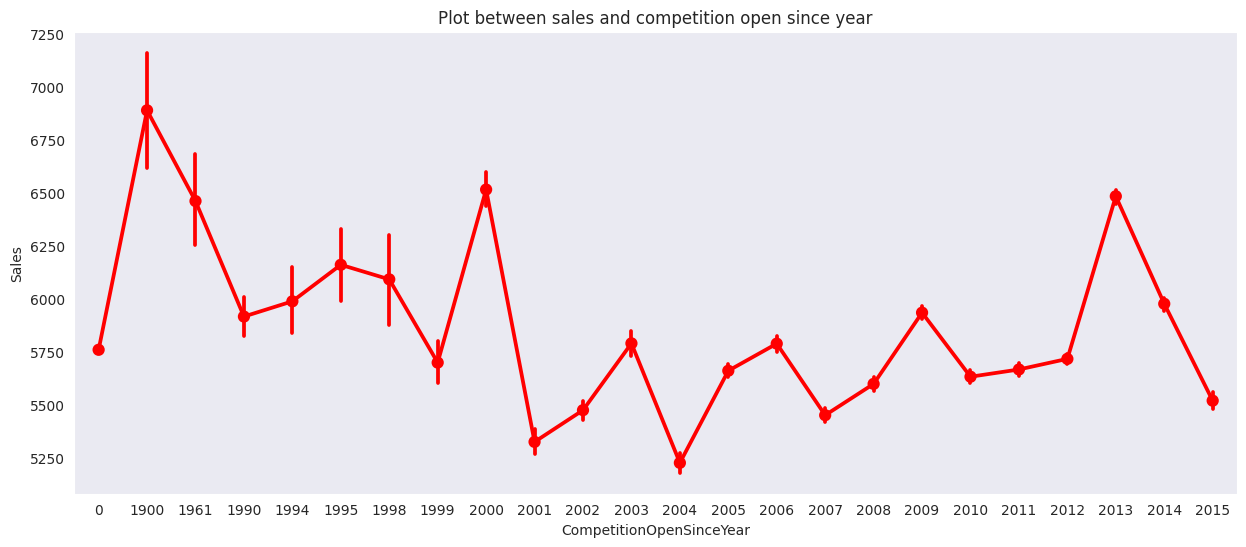

In [ ]:

plt.figure(figsize=(15,6))
sns.pointplot(x='CompetitionOpenSinceYear',y='Sales',data=final,color='Red')
sns.set_style("dark")
plt.title('Plot between sales and competition open since year')

from the above graph it can be obsereved that sales was highest in the year 1900.as the no of stores are less by that time so competition was also less.but as more no of stores open it effects the sale and sales become moderate.in year 2000 the sales was at its peak but afterwards a pattern of decrease and than increase for a small period is observed.

Text(0.5, 1.0, 'Plot betwen sales and promo2sinceyear')

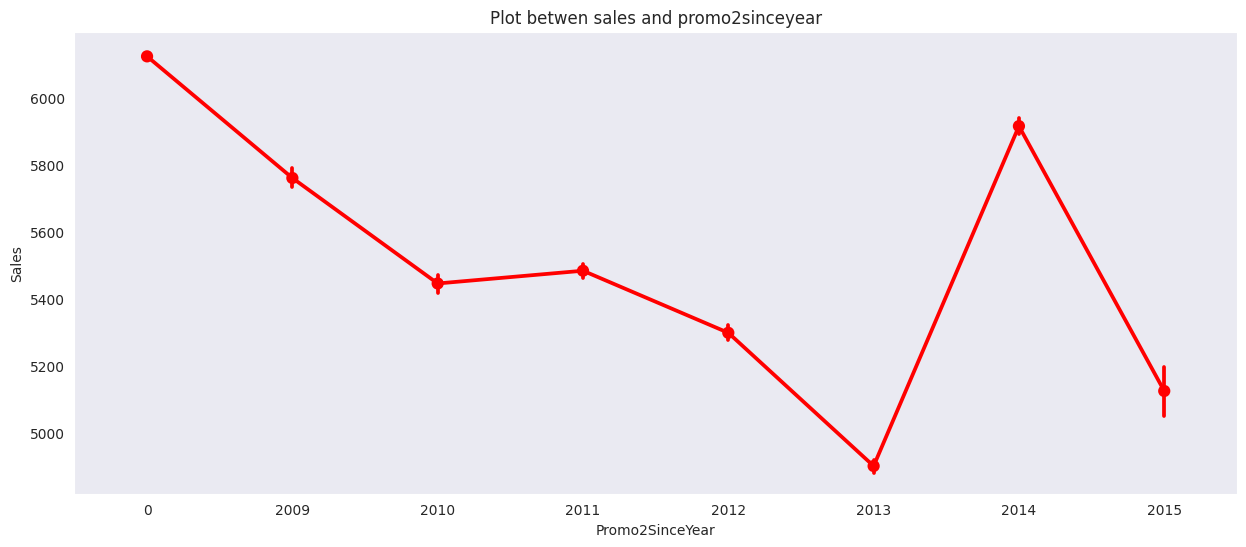

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x='Promo2SinceYear',y='Sales',data=final,color='Red')
sns.set_style("dark")
plt.title("Plot betwen sales and promo2sinceyear")

from the above graph of sales vs promotion it has been observed that the sales keeps on decreasing even though consistent promotion was done.it was very low in the year 2013 and 2015.one of the reason for such poor performance can be the increasing competition day by day.

Text(0.5, 1.0, 'Plot betwen sales and day of week')

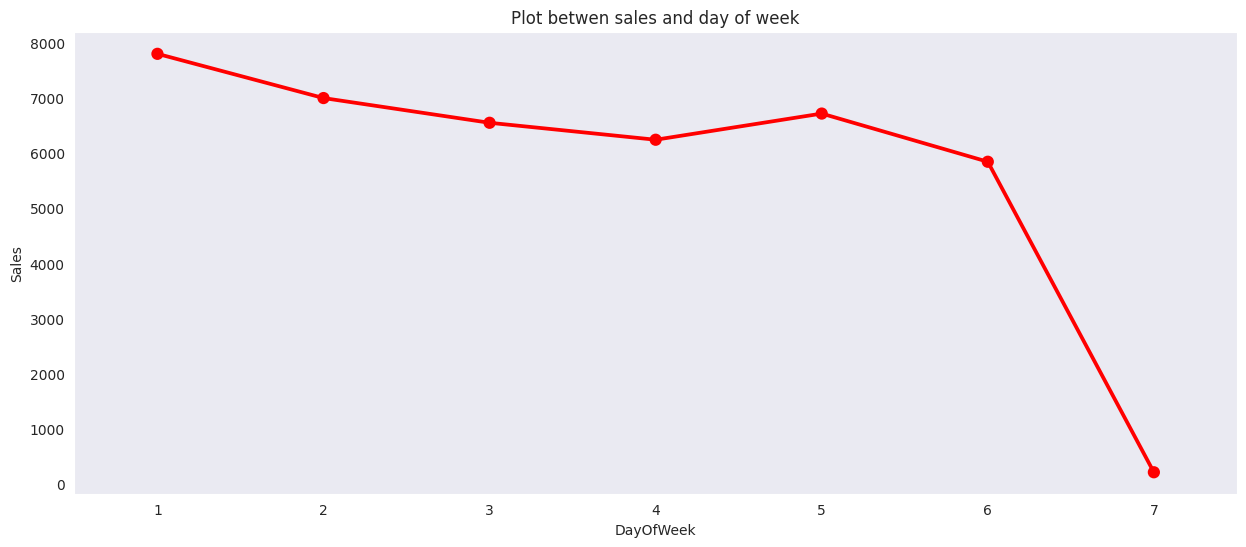

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x='DayOfWeek',y='Sales',data=final,color='Red')
sns.set_style("dark")
plt.title("Plot between sales and day of week")

from the ablove graph it can be seen very clearly that maximum sales is on day1 ie Monday.people prefer to  stock their needs in the beginning of every week.this purchase decreased day by day and reached to 0 at the end of the week ie on sunday.most of the stores are closed on sunday can be one of the reason.

Text(0.5, 1.0, 'Plot between sales and CompetitionOpenSinceMonth')

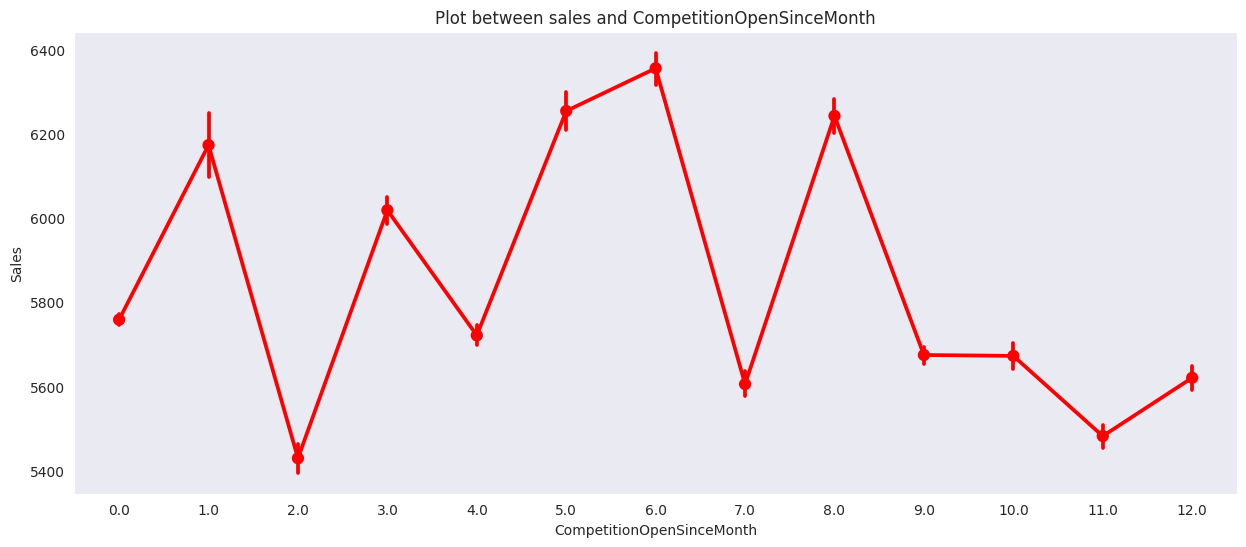

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x='CompetitionOpenSinceMonth',y='Sales',data=final,color='Red')
sns.set_style("dark")
plt.title("Plot between sales and CompetitionOpenSinceMonth")

from the above figure it can be seen that there is a sharp increase in sales in the begining and mid of every year.it is fluctuation in rest of the month.it is at lowest at the end of the year

BOXPLOT

Text(0.5, 1.0, 'Box plot for sales value')

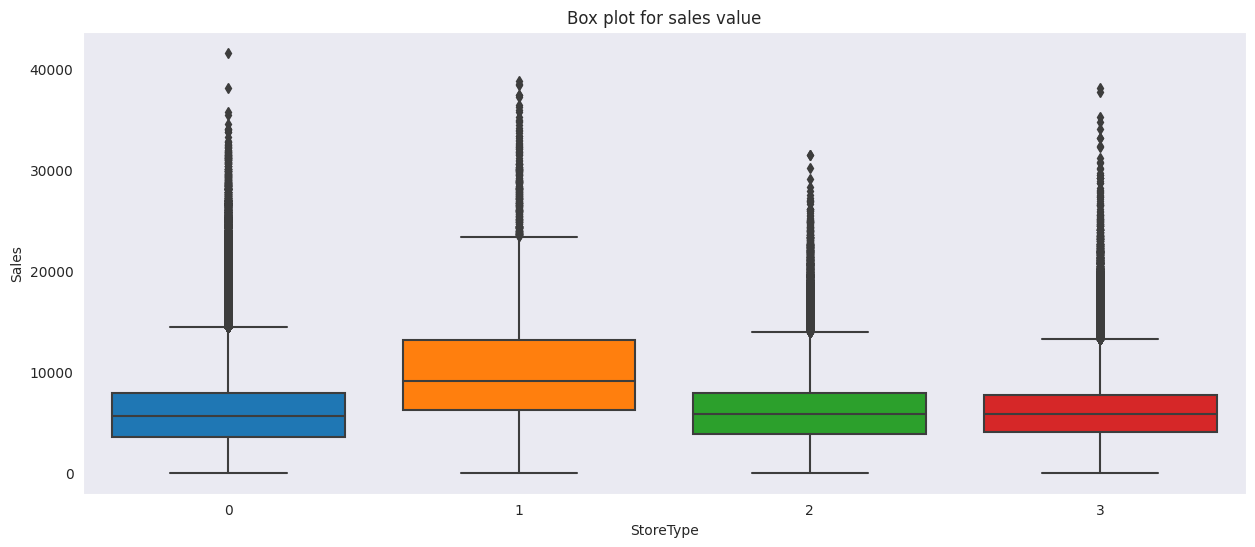

In [ ]:
plt.figure(figsize=(15,6))
plot_storetypes_sales=sns.boxplot(x='StoreType',y='Sales',data=final,saturation=1.5,width=0.8)
plt.title('Box plot for sales value')

the average sales for store type 1 is highest.the average sales of store type 0,2,3 is same and less as compared to store type 1.

Text(0.5, 1.0, 'Store daily open countplot')

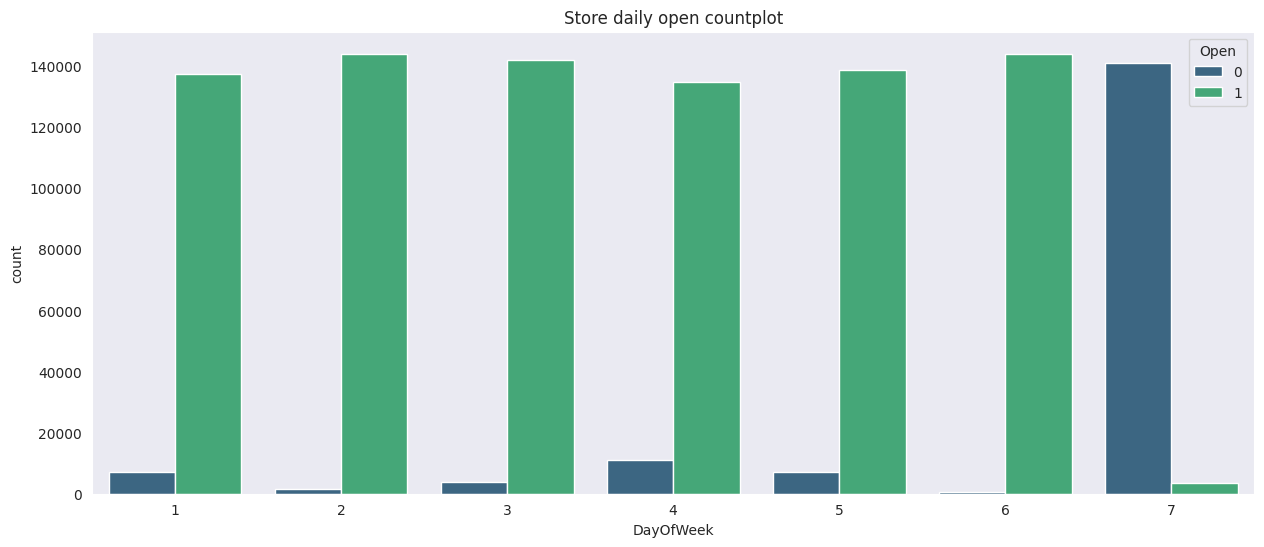

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='DayOfWeek',hue='Open',data=final,palette='viridis')
plt.title('Store daily open countplot')

All stores are open in weekdays and closed on sunday.

Text(0.5, 1.0, 'Store daily promo countplot')

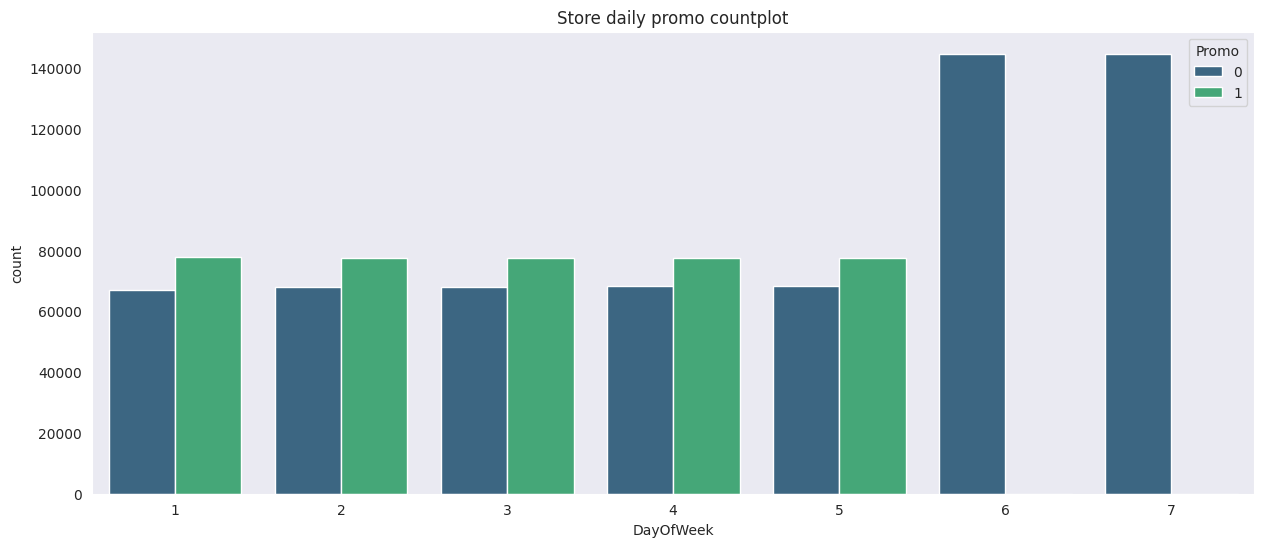

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='DayOfWeek',hue='Promo',data=final,palette='viridis')
plt.title('Store daily promo countplot')

the promo for 50% stores is done on daily basis except saturday and sunday.

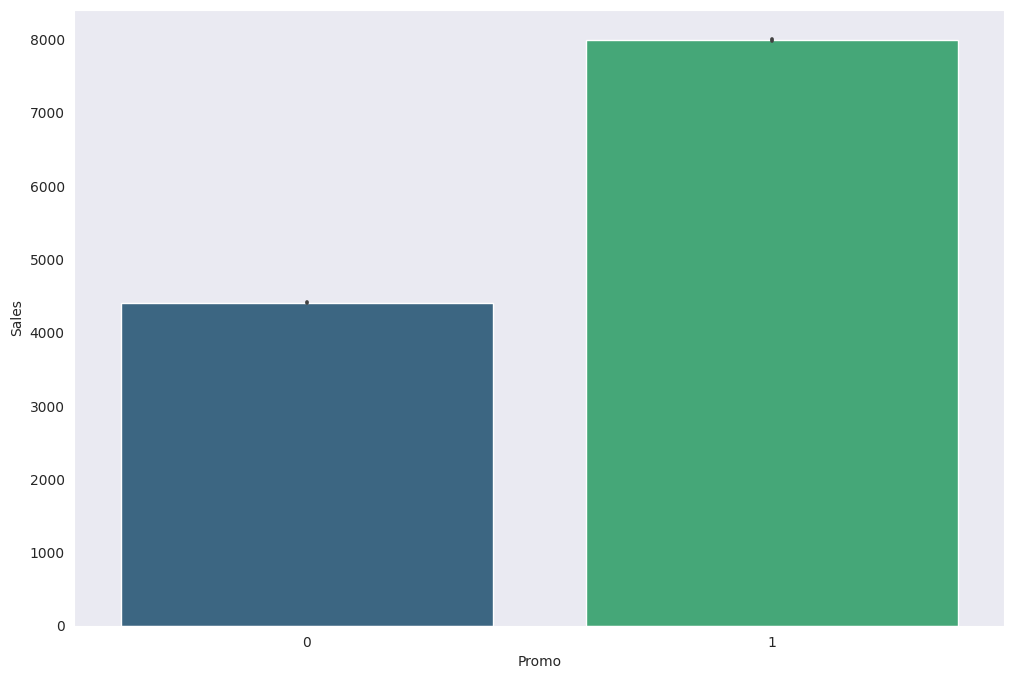

In [ ]:
plt.figure(figsize=(12,8))
promo_sales=sns.barplot(x='Promo',y='Sales',data=final,palette='viridis')

the stores doing promotion regularly has good almost double sales as compared to store not doing any promotions.

**State holidays sales
0=public holiday,1=easter holiday,2=christmas,3=none**

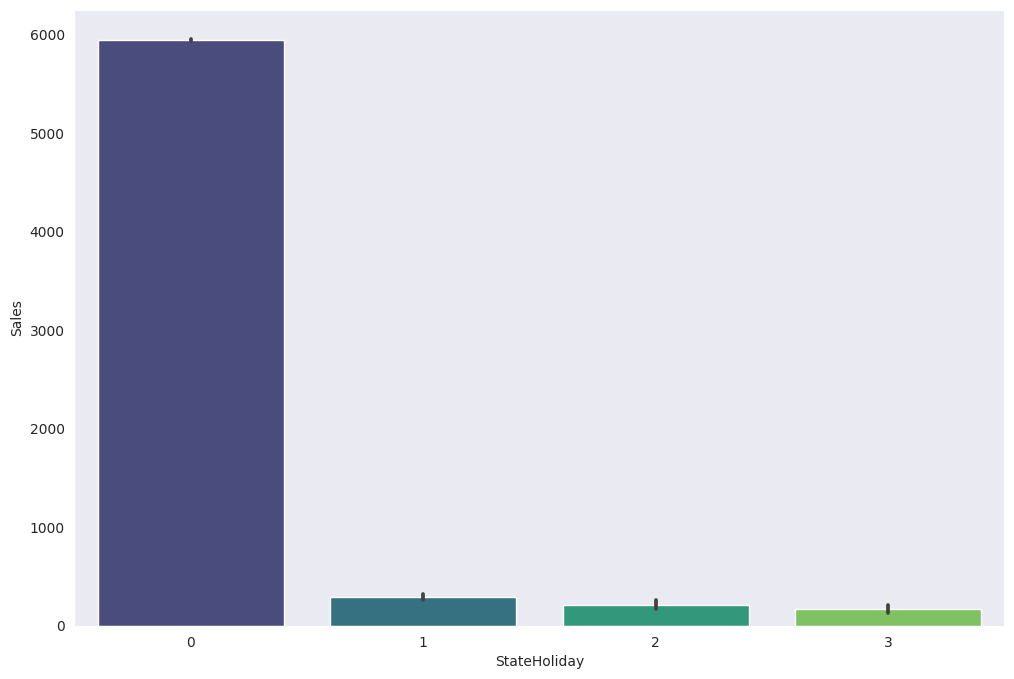

In [ ]:
plt.figure(figsize=(12,8))
stateholiday_sales=sns.barplot(x='StateHoliday',y='Sales',data=final,palette='viridis')

sales on school holidays
0=no holiday 1=holiday

the sales on public holiday is highest as compared to other holidays

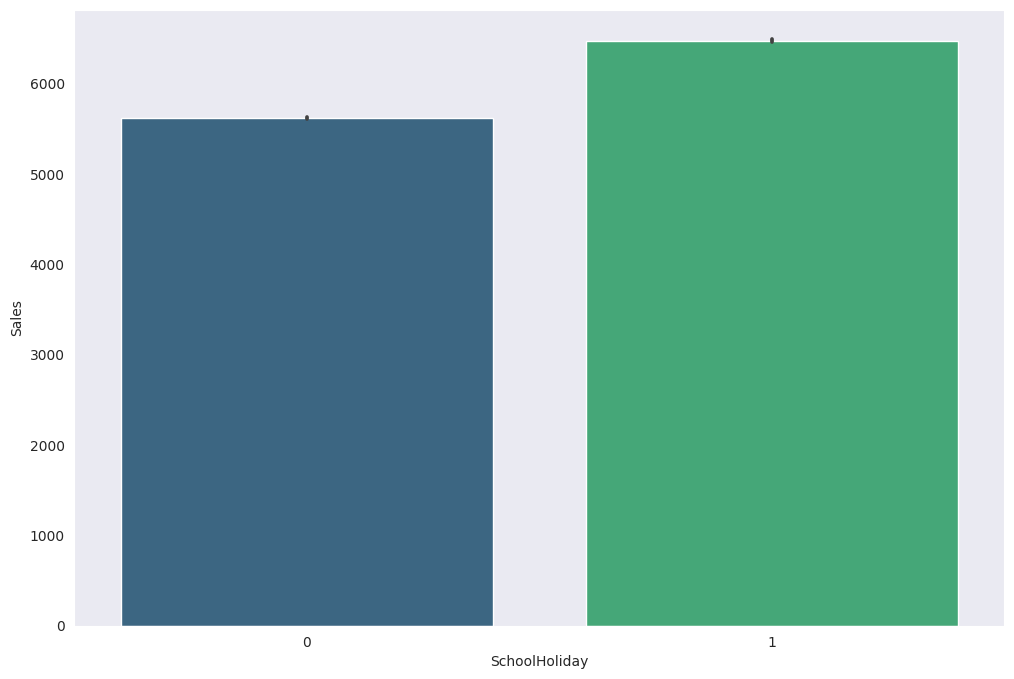

In [ ]:
plt.figure(figsize=(12,8))
schoolholiday_sales=sns.barplot(x='SchoolHoliday',y='Sales',data=final,palette='viridis')

the school holiday has less impact on sales.irrespective of school holiday there is sales

**business intelligencce**

1.due to multiple competitors the sales has negtive impact.some innovative strategies needs to be developed in order to attract more costomers and increase the sales.
2.store type 1 has good average sales as compared to other store type.hence other stores should also follow the staretegy same as store 1.
3.there is a sharp drop in sales on sundays due to close of store.we need to keep them open on sunday as well.
4.the stores doing no promotion  does not produce good sales.hence the we need to promote all the stores.it ll have a positive impact on sales.mostly people are shopping on public holidays hence extra effort and manpower is required during public holidays.



```
# This is formatted as code
```

**6.feature engineering and data preprocessing**

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

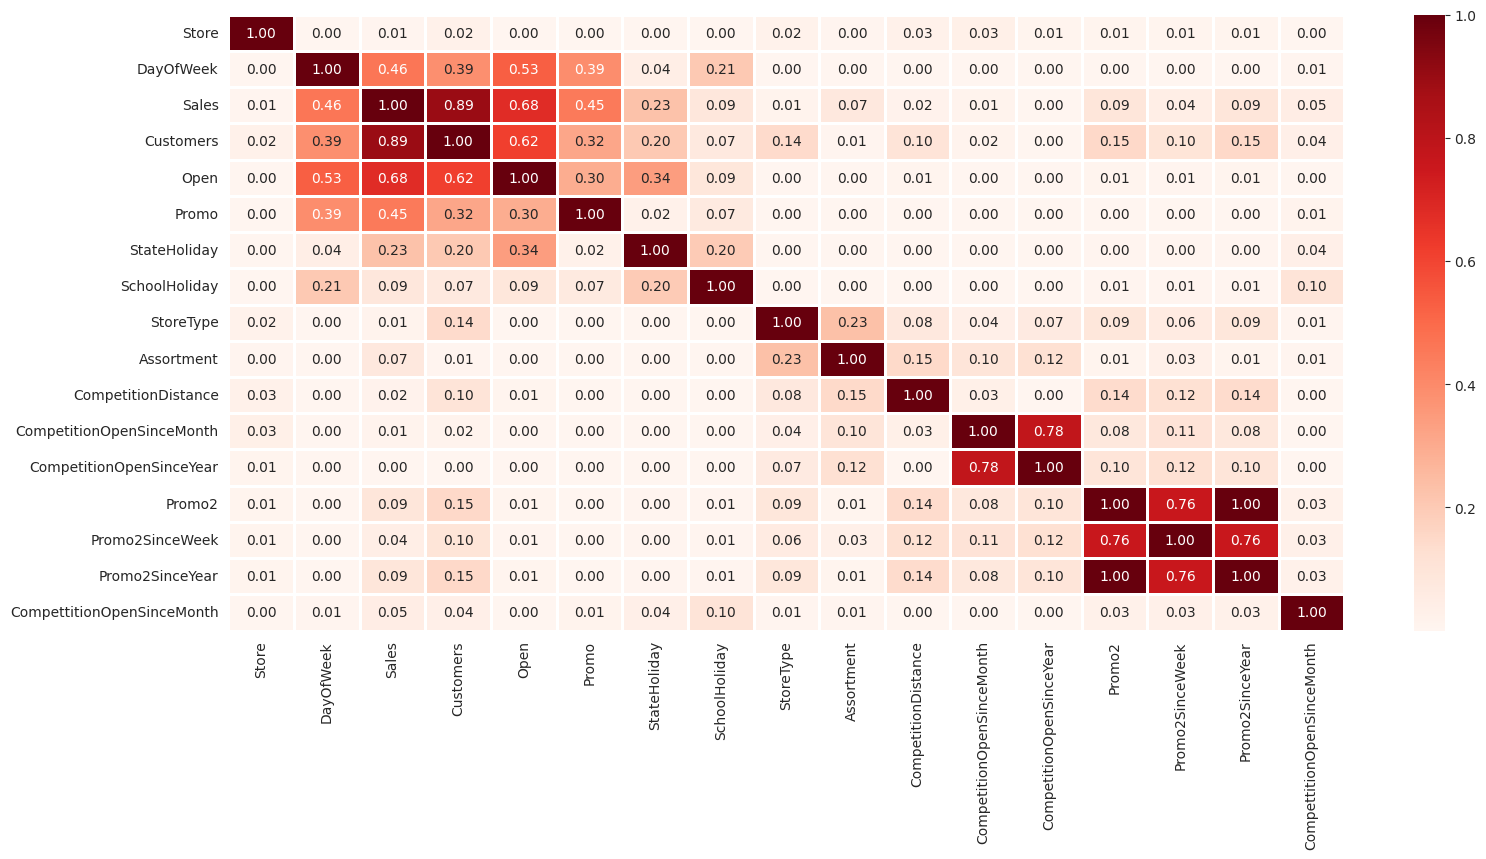

In [ ]:
plt.figure(figsize=(18,8))
correlation=final.corr()
sns.heatmap(abs(correlation),annot=True,cmap='Reds',linewidths=2,fmt=".2f")

it can be seen that sales is highly correlated with customers and store open which is quite obvious.
it should b ealso observed that promo2 is highly correlated with weekly and yearly promo

**checking for multi colinearity**

In [ ]:
def calc_vif(X):
  #calculating VIF
  vif=pd.DataFrame()
  vif["variables"]=X.columns
  vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return(vif)

In [ ]:
calc_vif(final[[i for i in final.describe().columns if i not in ['Sales']]])



,variables,VIF
0,Store,3.704212e+00
1,DayOfWeek,4.106203e+00
2,Customers,5.244371e+00
3,Open,9.388831e+00
4,Promo,1.917412e+00
5,StateHoliday,1.188037e+00
6,SchoolHoliday,1.330849e+00
7,StoreType,1.941250e+00
8,Assortment,2.045429e+00
9,CompetitionDistance,1.595004e+00


in the above result we can see that promo2 and promo2sinceyear VIF is higher.so we will drop either promo2 or promo2since year and check the VIF AGAIN

In [ ]:
final.drop(['Promo2'],axis=1)
calc_vif(final[[i for i in final.describe().columns if i not in ['Sales','Promo2']]])

,variables,VIF
0,Store,3.701610
1,DayOfWeek,4.105816
2,Customers,5.243753
3,Open,9.387501
4,Promo,1.917364
5,StateHoliday,1.188037
6,SchoolHoliday,1.330832
7,StoreType,1.935283
8,Assortment,2.039858
9,CompetitionDistance,1.588845


VIF factor BELOW 10 look good for ML  MODEL

**ANALYSIS OF TARGET VARIABLE IE SALES**

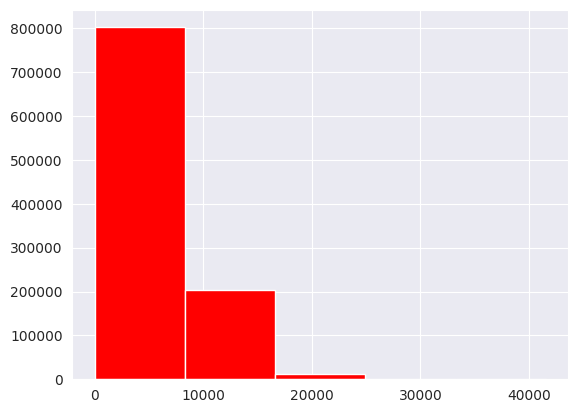

In [ ]:
pd.Series(final['Sales'],).hist(bins=5,color='red')
plt.show()

In [ ]:
final[(final.Open==0)&(final.Sales==0)].count()[0]

172817

there are 172817 records where store is open but sales is 0.so we will drop those store.

In [ ]:
new_df=final.drop(final[(final.Open==0)& (final.Sales==0)].index)

In [ ]:
new_df.shape

(844392, 19)

In [ ]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompettitionOpenSinceMonth
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,9.0,2008,0,0,0,0,7
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,11.0,2007,1,13,2010,"Jan,Apr,Jul,Oct",7
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,12.0,2006,1,14,2011,"Jan,Apr,Jul,Oct",7
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,9.0,2009,0,0,0,0,7
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,4.0,2015,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,0,150,9.0,2006,0,0,0,0,1
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,1,860,10.0,1999,0,0,0,0,1
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,1,840,0.0,0,1,48,2012,"Jan,Apr,Jul,Oct",1
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,1,1430,0.0,0,0,0,0,0,1


in new_df dataset column name 'promointerval' will change into dummies.it menas that each new column will have a binary value 0 or 1.

In [ ]:
new_df=pd.get_dummies(new_df,columns=['PromoInterval'])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844392 non-null  int64         
 1   DayOfWeek                       844392 non-null  int64         
 2   Date                            844392 non-null  datetime64[ns]
 3   Sales                           844392 non-null  int64         
 4   Customers                       844392 non-null  int64         
 5   Open                            844392 non-null  int64         
 6   Promo                           844392 non-null  int64         
 7   StateHoliday                    844392 non-null  int64         
 8   SchoolHoliday                   844392 non-null  int64         
 9   StoreType                       844392 non-null  int64         
 10  Assortment                      844392 non-null  int64 

In [ ]:
new_df.to_csv('cleandata.csv',index=False)



```
# This is formatted as code
```

**5.HYPOTHESIS TESTING**

HYPOTHETICAL STtement1
model1(excluding rows which has sales=0)
model2(by taking whole dataset)

**7.ML MODEL IMPLEMENTATION**


7.1 MODEL TRAINING

In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2,mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report


MODEL1(excluding rows which has sales=0)
As we have two datasets first one having sales=0 rows and other excluding it.we will use both the datasets and find the best model.

**Frist we will take datasets excluding sales=0 rows**

In [ ]:
#defining dependent variables
dependent_variable='Sales'
#defining independent variable
independent_variable=list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))
independent_variable

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'CompettitionOpenSinceMonth',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [ ]:
#create the data of independent variables
x=new_df[independent_variable].values

#create the data of dependent variables
y=new_df[dependent_variable].values

In [ ]:
#splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(675513, 19)
(168879, 19)


In [ ]:
#here we train the model
reg=LinearRegression().fit(X_train,y_train)

In [ ]:
reg.score(X_train,y_train)

0.7635267370853721

In [ ]:
#checking the co efficient/slope of different indepenedent/predictor column
reg.coef_

array([-1.62304830e-01, -6.85632335e+01,  6.35405559e+00, -3.39106521e-12,
        1.29658454e+03, -1.28024219e+03,  3.62148110e+01,  2.76850423e+02,
        2.22253769e+02,  2.88122276e-02, -3.41630980e+00,  9.62959874e-02,
       -4.29851495e+01,  1.24731554e+01,  2.99494713e+01,  4.29851495e+01,
        3.27188681e+01,  1.37352227e+02, -2.13056245e+02])

In [ ]:
#checking the intercept/constant of different independent columns
reg.intercept_

702.1848363267991

In [ ]:
#predicting dependent variable with test dataset ie 20%
y_pred=reg.predict(X_test)
y_pred

array([5317.0602638 , 4866.09665736, 7248.10483812, ..., 4113.85595099,
       7773.52232112, 5366.88361731])

In [ ]:
#original test dependent value
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828])

In [ ]:
#predicting on train dataset
y_pred_train=reg.predict(X_train)
y_pred_train

array([5505.88962213, 6823.22907763, 6699.34809581, ..., 7926.9455616 ,
       6886.5431456 , 6132.67656689])

In [ ]:
#depenent variable with train dataset ie 80%
y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862])

In [ ]:
#calculate MSE & RMSE for test prediction
MSE=mean_squared_error(y_test,y_pred)
print('MSE:',MSE)

RMSE=np.sqrt(MSE)
print('RMSE:',RMSE)

MSE: 2265374.981419134
RMSE: 1505.1162684055787


In [ ]:
r2=r2_score(y_test,y_pred)
print('r2:',r2)

r2: 0.7634943810452418


In [ ]:
pd.DataFrame(zip(y_test,y_pred),columns=['actual','pred'])

,actual,pred
0,5495,5317.060264
1,5472,4866.096657
2,7969,7248.104838
3,7384,6085.642130
4,13212,7822.826238
...,...,...
168874,16337,16391.539550
168875,9195,7063.602989
168876,2938,4113.855951
168877,10413,7773.522321


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.9 MB/s eta 0:00:00


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=bbcfa1decc36fd1f12dda5587ba67598eaecd7f70448faf850bd61ea307f2b90
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


SHAP and LIME

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular

#load the Rossman dataset
data=pd.read_csv('/content/cleandata.csv',low_memory=False)

#convert the 'date' column to datetime format
data['Date']=pd.to_datetime(data['Date'])

#extract year,month and day of week from date column
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['DayOfWeek']=data['Date'].dt.dayofweek

#select relevant features
features=['Store','DayOfWeek','Promo','StateHoliday','Year','Month']

#split the dataset into training and test sets
X_train,X_test,y_train,y_test=train_test_split(data[features],data['Sales'],test_size=0.2,random_state=42)

#create a linear regression model
model=LinearRegression()

#train the model on the training set
model.fit(X_train,y_train)

#create a SHAP explainer object
explainer=shap.LinearExplainer(model,X_train,feature_dependence='independent')

#callculate SHAP values for the test set
shap_values=explainer.shap_values(X_test)

#plot the SHAP values for the first feature of the first test instance
shap.summary_plot(shap_values,X_test,feature_names=X_test.columns)

#create a LIME explainer object
explainer=lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names=X_train.columns,class_names=['Sales'],mode='regression')

#explain the prediction for the first test instance using LIME
exp=explainer.explain_instance(X_test.values[0],model.predict,num_features=4)

#print the lime expression
print(exp.as_list())

FileNotFoundError: ignored

LASSO

In [ ]:
from sklearn.model_selection import cross_val_score
L1=Lasso(alpha=0.4,max_iter=10000,selection='cyclic',tol=0.0001,)

In [ ]:
L1.fit(X_train,y_train)

Lasso(alpha=0.4, max_iter=10000)

In [ ]:
y_pred_lasso=L1.predict(X_test)

In [ ]:
L1.score(X_test,y_test)

0.1492437476098124

In [ ]:
cv_scores=cross_val_score(L1,x,y,cv=10)
mean_cv_score=cv_scores.mean()

In [ ]:
cv_scores

array([0.73076609, 0.748879  , 0.76079326, 0.75804146, 0.75829715,
       0.76482626, 0.76722901, 0.75272557, 0.75812439, 0.78478324])

In [ ]:
mean_cv_score

0.7584465441604318

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score
#define the range of alpha values to test
parameters={'alpha':[0.1,0.2,0.3,0.4,0.5]}

#perform grid search to find the best alpha value
lasso_cv=GridSearchCV(L1,parameters,cv=5)
lasso_cv.fit(x,y)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.4, max_iter=10000),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [ ]:
#extract the best alpha value and corresponding score
best_alpha_lasso=lasso_cv.best_params_['alpha']
best_score_lasso=lasso_cv.best_score_

In [ ]:
best_alpha_lasso

0.2

In [ ]:
best_score_lasso

0.7605766545697622

In [ ]:
pd.DataFrame(zip(y_test,y_pred_lasso),columns=['actual','pred'])

,actual,pred
0,5203,5840.157481
1,8590,7806.977727
2,6465,6433.504276
3,7250,6266.318018
4,4339,6032.341351
...,...,...
168874,10096,8329.504755
168875,12400,7985.085318
168876,7499,5305.601865
168877,11606,7875.584128


Ridge

In [ ]:
L2=Ridge(alpha=0.5)

In [ ]:
L2.fit(X_train,y_train)

Ridge(alpha=0.5)

In [ ]:
L2.predict(X_test)

array([5839.50988499, 7807.01893948, 6433.16609345, ..., 5304.44673008,
       7876.35986421, 5975.32760985])

In [ ]:
L2.score(X_test,y_test)

0.1492641570293859

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,cross_val_score
ridge=Ridge(max_iter=10000,solver='auto')

#define the range of alpha values to test
parameters={'alpha':[0.1,0.2,0.3,0.4,0.5]}

#perform grid search to find the best alpha values
ridge_cv=GridSearchCV(L2,parameters,cv=5)
ridge_cv.fit(x,y)

#extract the best alpha value and corresponding score
best_alpha=ridge_cv.best_params_['alpha']
best_score=ridge_cv.best_score_

#perform cross validation with the best alpha value
ridge_best=Ridge(alpha=best_alpha,max_iter=10000,solver='auto')
cv_scores=cross_val_score(ridge_best,x,y,cv=5)

#find the maximum score and corresponding alpha value
max_score=cv_scores.max()
max_alpha=best_alpha

print("Best alpha value: ", best_alpha)
print("Best score: ", best_score)
print("Maximum CV score: ", max_score)
print("Corresponding alpha value: ", max_alpha)

Best alpha value:  0.5
Best score:  0.7605748203950534
Maximum CV score:  0.7700263839321813
Corresponding alpha value:  0.5


**Elastic net**

In [ ]:

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV,train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[features], data['Sales'], test_size=0.2, random_state=0)

#define the Elastic Net model
elastic_net=ElasticNet(max_iter=10000)

#define the range of alpha and L1 ratio values to test
parameters={'alpha':[0.1,0.2,0.3,0.4,0.5],'l1_ratio':[0.1,0.3,0.5,0.7,0.9]}

#perform grid search to find the best alpha and L1 ratio values
elastic_net_cv=GridSearchCV(elastic_net,parameters,cv=5)
elastic_net_cv.fit(X_train,y_train)

#extract the best alpha and L1 _ratio values and corresponding score
best_alpha=elastic_net_cv.best_params_['alpha']
best_l1_ratio=elastic_net_cv.best_params_['l1_ratio']
best_score=elastic_net_cv.best_score_

#create an Elastic Net model with the best hyperparameters
elastic_net_best=ElasticNet(alpha=best_alpha,l1_ratio=best_l1_ratio,max_iter=10000)
elastic_net_best.fit(X_train,y_train)

#evaluate the model on testing data set
test_score=elastic_net_best.score(X_test,y_test)
print('best alpha value:',best_alpha)
print('best l1_ratio value',best_l1_ratio)
print('best_score',best_score)
print('test_score',test_score)


best alpha value: 0.1
best l1_ratio value 0.9
best_score 0.1491245481362192
test_score 0.14955095349810943


Decision Tree

In [ ]:
sales_mean=final[dependent_variable].mean()

In [ ]:
sales_mean

5773.818972305593

In [ ]:
sales_mean_new=new_df[dependent_variable].mean()

In [ ]:
sales_mean_new

6955.514290755952

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train,y_train)
y_pred_dt=decision_tree.predict(X_test)
y_train_dt=decision_tree.predict(X_train)
MSE=mean_squared_error(y_test,y_pred_dt)
print('MSE:',MSE)

RMSE=np.sqrt(MSE)
print('RMSE',RMSE)

RMPSE=RMSE/sales_mean_new
print('RMPSE',RMPSE)
r2=r2_score(y_test,y_pred_dt)
print('R2',r2)

MSE: 7531166.038058397
RMSE 2744.2970025233053
RMPSE 0.39454983309725106
R2 0.2137447001527959


**MODEL2(BY TAKING WHOLE DATASET**
in final dataset column name 'PromoInterval' change into dummies.It means that each new column will have a binary value(0 or 1)

In [ ]:
final = pd.get_dummies(final, columns=['PromoInterval'])

In [ ]:
final.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CompettitionOpenSinceMonth,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,9.0,2008.0,0,0.0,0.0,7,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,11.0,2007.0,1,13.0,2010.0,7,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,12.0,2006.0,1,14.0,2011.0,7,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,9.0,2009.0,0,0.0,0.0,7,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,4.0,2015.0,0,0.0,0.0,7,1,0,0,0


we will define dependent and independent variable and convert them into arrays

In [ ]:
#defining independent variable
dep_var='Sales'

#defining independednt variable
indep_var=final.columns.drop(['Store','Promo2SinceYear','Date','Sales'])

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   StoreType                       1017209 non-null  int64         
 10  Assortment                      1017209 no

In [ ]:
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'CompettitionOpenSinceMonth', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [ ]:
#create the data of independent variables
U=final[indep_var].values
#create the dependent variables data
V=final[dep_var].values

In [ ]:
V

array([5263, 6064, 8314, ...,    0,    0,    0])

In [ ]:
U

array([[  5., 555.,   1., ...,   0.,   0.,   0.],
       [  5., 625.,   1., ...,   0.,   1.,   0.],
       [  5., 821.,   1., ...,   0.,   1.,   0.],
       ...,
       [  2.,   0.,   0., ...,   0.,   0.,   0.],
       [  2.,   0.,   0., ...,   0.,   0.,   0.],
       [  2.,   0.,   0., ...,   0.,   0.,   1.]])

In [ ]:
final[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,CompettitionOpenSinceMonth,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0,1,2,0,1270,9.0,2008,0,0,7,1,0,0,0
1,5,625,1,1,0,1,0,0,570,11.0,2007,1,13,7,0,0,1,0
2,5,821,1,1,0,1,0,0,14130,12.0,2006,1,14,7,0,0,1,0
3,5,1498,1,1,0,1,2,2,620,9.0,2009,0,0,7,1,0,0,0
4,5,559,1,1,0,1,0,0,29910,4.0,2015,0,0,7,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,0,0,1900,6.0,2014,1,31,1,0,0,1,0
1017205,2,0,0,0,1,1,2,2,1880,4.0,2006,0,0,1,1,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,0.0,0,0,0,1,1,0,0,0
1017207,2,0,0,0,1,1,0,2,870,0.0,0,0,0,1,1,0,0,0


In [ ]:
#splitting the dataset
U_train,U_test,v_train,v_test=train_test_split(U,V,test_size=0.2,random_state=0)
print(U_train.shape)
print(U_test.shape)

(813767, 18)
(203442, 18)


**LINEAR REGRESSION**

In [ ]:
#SCALING THE X VALUES
scaler=StandardScaler()
U_train=scaler.fit_transform(U_train)
U_test=scaler.transform(U_test)

In [ ]:
#fitting the data into linear regression model
linear_regression=LinearRegression()
linear_regression.fit(U_train,v_train)

LinearRegression()

In [ ]:
v_pred=linear_regression.predict(U_test)
v_pred

array([ 7096.94241797, 12606.52835547,  9203.96194922, ...,
        6943.0146836 ,  5995.54202735,  3997.70023047])

In [ ]:
linear_regression.score(U_train,v_train)

0.8678002413729247

In [ ]:
regression_Dataframe=pd.DataFrame(zip(v_test,v_pred),columns=['actual','pred'])
regression_Dataframe

,actual,pred
0,7285,7096.942418
1,6221,12606.528355
2,8132,9203.961949
3,20916,11540.686559
4,5472,6602.616246
...,...,...
203437,5650,6669.225621
203438,5464,6520.520543
203439,6191,6943.014684
203440,5663,5995.542027


In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(v_test,v_pred)
print('MSE',MSE)

RMSE=np.sqrt(MSE)
print('RMSE',RMSE)

RMPSE=RMSE/sales_mean
print('RMPSE',RMPSE)

r2=r2_score(v_test,v_pred)
print('R2',r2)

MSE 1944192.9469788217
RMSE 1394.3431955508017
RMPSE 0.24149409640981775
R2 0.868428799652706


**DECISION TREE**

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train,v_train)
v_pred_dt=decision_tree.predict(U_test)
v_train_dt=decision_tree.predict(U_train)
MSE=mean_squared_error(v_test,v_pred_dt)
print('MSE',MSE)

RMSE=np.sqrt(MSE)
print('RMSE',RMSE)

RMPSE=RMSE/sales_mean
print('RMPSE',RMPSE)

r2=r2_score(v_test,v_pred)
print('R2',r2)

MSE 1938797.0529188653
RMSE 1392.4069279197317
RMPSE 0.24115874338951052
R2 0.868428799652706


In [ ]:
decisiontree_Dataframe=pd.DataFrame(zip(v_test,v_pred_dt),columns=['actual','predict'])
decisiontree_Dataframe

,actual,predict
0,7285,6405.437098
1,6221,10731.775506
2,8132,9096.411096
3,20916,11835.110635
4,5472,5476.684725
...,...,...
203437,5650,5476.684725
203438,5464,5476.684725
203439,6191,8169.463222
203440,5663,6405.437098


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

#create a random forest regressor with n_estimators=500,max_depth=8 and n_jobs=2
random_forest=RandomForestRegressor(n_estimators=500,max_depth=8,n_jobs=2)

#fit the random forest to the training dataset
random_forest.fit(U_train,v_train)

#make prediction on the test data
v_pred_rf=random_forest.predict(U_test)

#calculate the mean squared error between peredicted and actual values
MSE=mean_squared_error(v_test,v_pred_rf)
print('MSE',MSE)

#calculate the ROOT mean squared error between peredicted and actual values
RMSE=np.sqrt(MSE)
print('RMSE',RMSE)

#calculate the ROOT mean squared PERCENTAGE error between peredicted and actual values
RMPSE=RMSE/sales_mean
print('RMPSE',RMPSE)

# Calculate the coefficient of determination (R2 score)
r2=r2_score(v_test,v_pred_rf)
print('R2',r2)

MSE 1118240.5009374053
RMSE 1057.4689125158268
RMPSE 0.18314895523881655
R2 0.924324257418008


In [ ]:
import xgboost as xgb
xgboost=xgb.XGBRegressor(n_estimator=500,max_depth=8,n_jobs=2)
xgboost.fit(U_train,v_train)
v_pred_xgb=xgboost.predict(U_test)
#calculate the mean squared error between peredicted and actual values
MSE=mean_squared_error(v_test,v_pred_rf)
print('MSE',MSE)

#calculate the ROOT mean squared error between peredicted and actual values
RMSE=np.sqrt(MSE)
print('RMSE',RMSE)

#calculate the ROOT mean squared PERCENTAGE error between peredicted and actual values
RMPSE=RMSE/sales_mean
print('RMPSE',RMPSE)

# Calculate the coefficient of determination (R2 score)
r2=r2_score(v_test,v_pred_rf)
print('R2',r2)

In [118]:
from sklearn.ensemble  import AdaBoostRegressor
adaboost=AdaBoostRegressor(n_estimators=500,learning_rate=0.01)
adaboost.fit(U_train,v_train)
v_pred_ada=adaboost.predict(U_test)
#calculate the mean squared error between peredicted and actual values
MSE=mean_squared_error(v_test,v_pred_rf)
print('MSE',MSE)

#calculate the ROOT mean squared error between peredicted and actual values
RMSE=np.sqrt(MSE)
print('RMSE',RMSE)

#calculate the ROOT mean squared PERCENTAGE error between peredicted and actual values
RMPSE=RMSE/sales_mean
print('RMPSE',RMPSE)

# Calculate the coefficient of determination (R2 score)
r2=r2_score(v_test,v_pred_rf)
print('R2',r2)

MSE 1117044.6916315395
RMSE 1056.9033501846511
RMPSE 0.18305100233556681
R2 0.9244051825473805


**Congratultions your model is successfully created and ready for deployment on a live server for a real user interaction!!!!**

**conclusion**
we saw that Sales column contains 172817 rows with 0 sale. So we created a   new dataframe in which we removed 0 sales rows and tried to train our model. We used various algorithms and got accuracy score around **74%.**



We were also curious about the total dataset(including Sales = 0 rows). So we trained another model using various algorithms and we got accuracy near about **98%** which is far better than previous model.




So we came to conclusion that removing sales=0 rows actually removes lot of information from dataset as it has **172817**   rows which is quite large and therefore we decided not to remove those values.We got our best rmpse score from **Random Forest model,Graident boosting technique like  adaboost ,Xgboost**,we tried taking an optimum parameter so that our model doesnt overfit.







